# Exploratory Data Analysis (EDA) on Cleaned Mobile Money Transactions

## 1. Import Required Libraries

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Load Cleaned Dataset

In [2]:
# Load cleaned dataset
df = pd.read_csv('../data/mobile_money_transactions_cleaned.csv')

## 3. Dataset Overview

In [3]:
# Display first few rows, shape, and columns
print(df.head())
print('Shape:', df.shape)
print('Columns:', df.columns.tolist())

  transactionType        amount         initiator  oldBalInitiator  \
0        TRANSFER  29874.629585  4537027967639631        187712.18   
1         PAYMENT      0.604301  4296267625767470             8.92   
2         PAYMENT  18601.569236  4178224023847746            93.60   
3        TRANSFER  59475.834350  4178224023847746          -452.25   
4         PAYMENT      0.604484  4779013371563747        159148.76   

   newBalInitiator         recipient  oldBalRecipient  newBalRecipient  \
0        167887.22  4875702729424478             8.31         19833.27   
1             8.92        25-0000401             0.00             0.00   
2          -452.25        13-0001587             0.00           545.85   
3        -20299.26  4096920916696293          4011.72         23858.74   
4        158601.88        75-0003564             0.00           546.89   

   isFraud country gender            timestamp      region age_group  
0        1   Ghana      M  2023-06-25 00:00:00     Eastern     

## 4. Missing Values Analysis

transactionType    0
amount             0
initiator          0
oldBalInitiator    0
newBalInitiator    0
recipient          0
oldBalRecipient    0
newBalRecipient    0
isFraud            0
country            0
gender             0
timestamp          0
region             0
age_group          0
dtype: int64


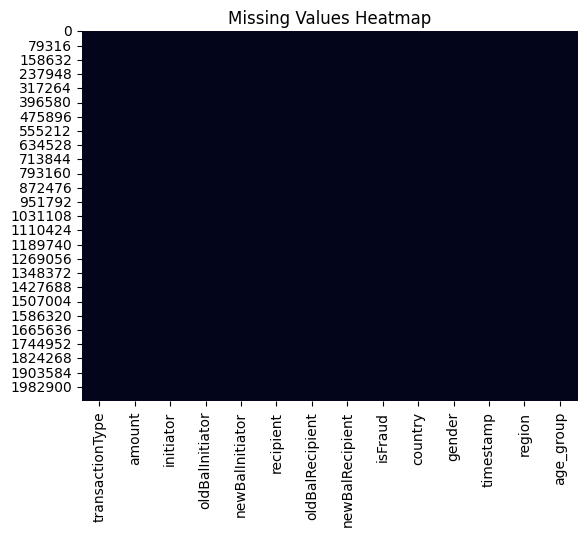

In [4]:
# Check for missing values
print(df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

## 5. Statistical Summary of Numeric Columns

In [5]:
# Summary statistics for numeric columns
print(df.describe())

             amount     initiator  oldBalInitiator  newBalInitiator  \
count  2.062198e+06  2.062198e+06     2.062198e+06     2.062198e+06   
mean   6.076993e+04  4.499921e+15     2.433530e+06     2.443692e+06   
std    9.707478e+04  2.896422e+14     1.307823e+06     1.297371e+06   
min    6.000027e-01  4.000062e+15    -1.999971e+05    -1.999971e+05   
25%    1.511324e+00  4.248623e+15     1.576054e+06     1.599472e+06   
50%    2.639630e+04  4.508521e+15     2.619829e+06     2.625878e+06   
75%    7.859590e+04  4.750928e+15     3.361289e+06     3.362079e+06   
max    2.638660e+06  4.999855e+15     1.224469e+07     1.224469e+07   

       oldBalRecipient  newBalRecipient       isFraud  
count     2.062198e+06     2.062198e+06  2.062198e+06  
mean      1.085494e+05     1.223094e+05  1.018428e-01  
std       2.829922e+05     3.190708e+05  3.024415e-01  
min      -1.983685e+05    -1.357280e+05  0.000000e+00  
25%       1.604903e+04     2.490121e+04  0.000000e+00  
50%       6.315837e+04  

## 6. Distribution of Transaction Amounts

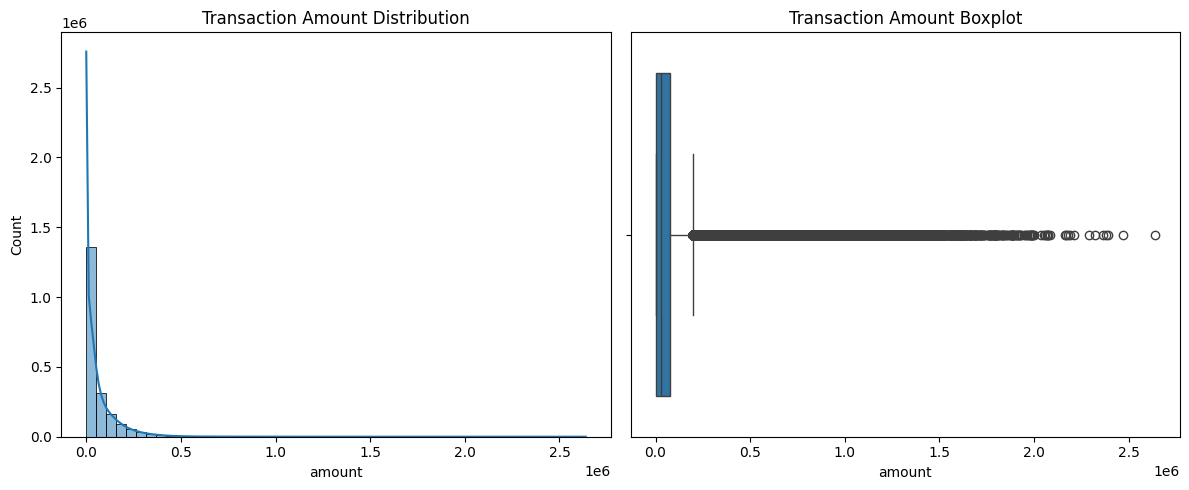

In [6]:
# Histogram and boxplot for 'amount'
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.subplot(1,2,2)
sns.boxplot(x=df['amount'])
plt.title('Transaction Amount Boxplot')
plt.tight_layout()
plt.show()

## 7. Transactions by Region

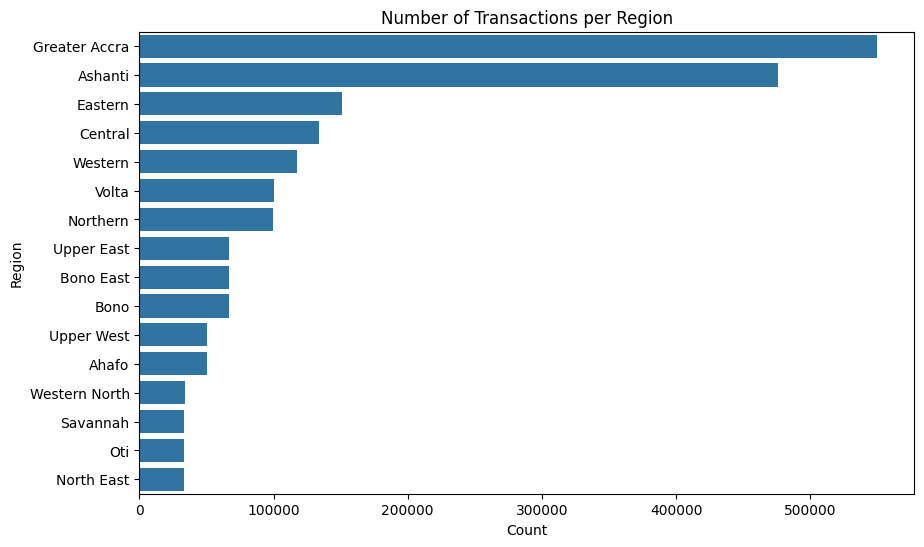

In [7]:
# Bar plot for transactions per region
plt.figure(figsize=(10,6))
sns.countplot(y='region', data=df, order=df['region'].value_counts().index)
plt.title('Number of Transactions per Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

## 8. Transactions by Age Group

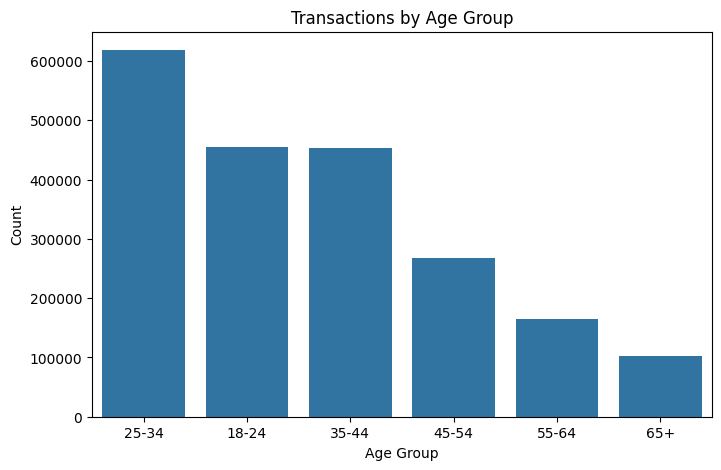

In [8]:
# Bar plot for transactions by age group
plt.figure(figsize=(8,5))
sns.countplot(x='age_group', data=df, order=df['age_group'].value_counts().index)
plt.title('Transactions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

## 9. Transactions Over Time

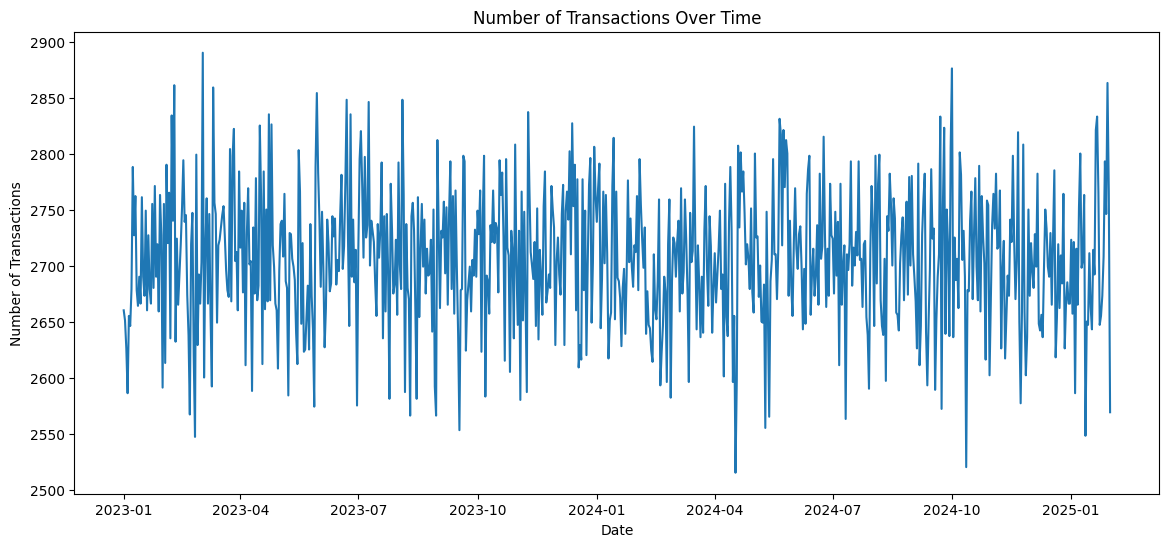

In [9]:
# Plot number of transactions over time
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date
transactions_per_day = df.groupby('date').size()
plt.figure(figsize=(14,6))
transactions_per_day.plot()
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

## 10. Gender Distribution

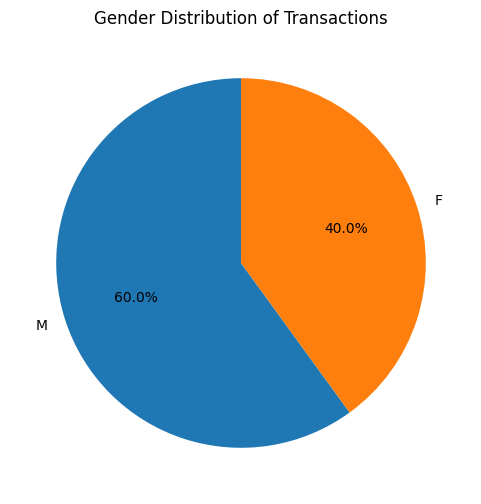

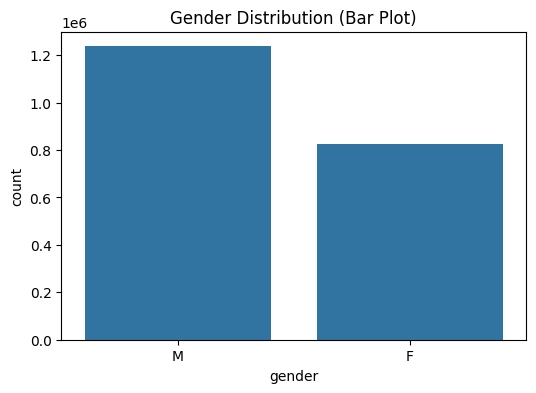

In [10]:
# Pie chart and bar plot for gender distribution
plt.figure(figsize=(6,6))
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution of Transactions')
plt.ylabel('')
plt.show()
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution (Bar Plot)')
plt.show()

## 11. Correlation Analysis

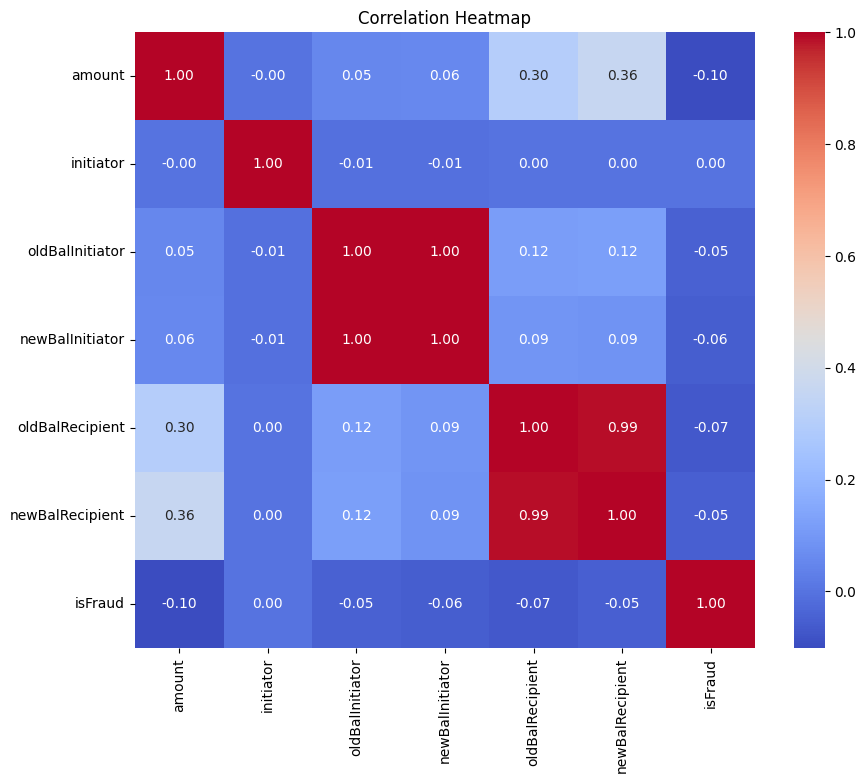

In [11]:
# Correlation heatmap for numeric columns
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## 12. Save EDA Outputs (Optional)

In [12]:
# Example: Save a plot to file
plt.figure(figsize=(8,5))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.savefig('../data/eda_transaction_amount_distribution.png')
plt.close()